### AIR Jordan Classifier Project:

The dataset used is one from kaggle and can be found at the following link:   [https://www.kaggle.com/shreykavi/air-jordans-retro-121?select=21](https://)

The dataset is in a zip file format with each type of Jordan in its own folder. The zip file has been uploaded onto our google drive and will be loaded into colab from there.

Data Loading:

In [2]:
import time
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip '/content/gdrive/My Drive/Third Year/APS360/Group 44 - APS360/AJ DATA(1).zip' -d '/root/datasets'

In [3]:
# define training and test data directories
data_dir = '/root/datasets'

# classes are folders in each directory with these names
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
           '14', '15', '16', '17', '18', '19', '20', '21']

In [4]:
# load and transform data using ImageFolder

# resize all images to 600 x 600
#data_transform = transforms.Compose([transforms.RandomResizedCrop(600), 
                                      #transforms.ToTensor()])
data_transform = transforms.Compose([transforms.CenterCrop(600), 
                                      transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=data_transform)

# print out some data stats
print('Num images: ', len(dataset))

# Prepare Dataloader
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)


Num images:  14509


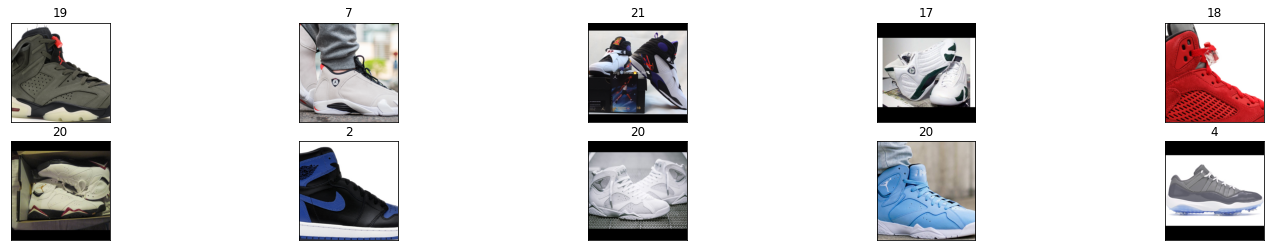

In [52]:
#THIS CODE ONLY WORKS OCASIONALLY WHEN ONE OF THE IMAGES IS NOT ONE THAT RAISES AN ERROR DUE TO NOT FINDING IT
#Based on the number of times i've ran this and the number of times its worked,
#The ratio of images that work to not work is not looking too good
# Verification Step - obtain one batch of images

dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

'''classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
           '14', '15', '16', '17', '18', '19', '20', '21']'''

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

#IMPORTANT NOTE
#THE ABOVE DOES NOT SPLIT THE DATA

In [21]:
#it looks like it fails in multiple places
#Fails on the 25th image, when I went to the dataset on our drive, this images preview wasnt on there
#Seems like it may be an issue where some images from the dataset are corrupted or just not being loaded right
#Tried both the zip file and the folders in the drive and both give this error at the same point which starts at shoe 50
for idx, (data, image) in enumerate(dataset): 
  print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


UnidentifiedImageError: ignored

In [5]:
#z is the number of images that dont work,
#length of workinglist is the number of images that do
workinglist=[]
notworkinglist=[]
z=0
for i in range(len(dataset)):
    try:
        workinglist.append((i,dataset[i][1]))
        #workinglist.append(dataset[i])
    except:
        notworkinglist.append(i)
        pass
        z+=1

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
#First index matches where we know it falls apart first
print(z)
print(len(notworkinglist))
print(notworkinglist)

961
961
[25, 63, 65, 67, 69, 75, 77, 90, 140, 145, 146, 148, 150, 179, 181, 187, 207, 234, 236, 238, 243, 247, 249, 251, 258, 272, 316, 322, 330, 370, 372, 376, 380, 382, 392, 396, 398, 425, 427, 431, 444, 447, 462, 464, 466, 468, 473, 475, 510, 513, 519, 523, 536, 537, 575, 590, 593, 596, 598, 602, 633, 642, 646, 648, 649, 659, 661, 663, 715, 717, 721, 723, 725, 727, 729, 730, 732, 735, 737, 739, 743, 745, 747, 752, 759, 764, 767, 786, 796, 798, 813, 831, 852, 855, 863, 865, 867, 882, 884, 888, 890, 891, 905, 974, 996, 1011, 1015, 1023, 1025, 1027, 1029, 1031, 1075, 1082, 1087, 1095, 1099, 1101, 1106, 1108, 1110, 1112, 1121, 1123, 1160, 1191, 1193, 1252, 1257, 1263, 1295, 1297, 1304, 1306, 1359, 1361, 1365, 1367, 1369, 1371, 1373, 1374, 1376, 1379, 1381, 1383, 1387, 1389, 1391, 1396, 1403, 1408, 1411, 1430, 1440, 1442, 1457, 1475, 1496, 1499, 1507, 1509, 1511, 1526, 1528, 1532, 1534, 1535, 1549, 1618, 1640, 1655, 1659, 1667, 1669, 1671, 1673, 1675, 1719, 1726, 1731, 1739, 1743, 1745, 

In [7]:
print(len(workinglist))
print(workinglist)

13548
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (64, 0), (66, 0), (68, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (76, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 0), (111, 0), (112, 0), (113, 0), (114, 0), (115, 0), (116, 0), (117,

In [ ]:
#Using the indices found in workinglist to add the images at those indices in the dataset
#to a different dataset named workingdataset that only includes working images
workingdataset=[]
for i in range(len(workinglist)):
  workingdataset.append(dataset[workinglist[i][0]])

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Quick Note: Based on the above images, there is gonna have to be some pre-processing where we center the shoe somehow. 400 x 400 size seemed too small as there was a lot of shoes being cut out. 600 x 600 seems reasonable but there are definitely images that are smaller

In [ ]:
#Need to shuffle the dataset proportionately before we can run this
split1 = int(len(dataset) * 0.7) #split at 70% for training
split2 = int(len(dataset)*0.85) #Second split so each of val and test have 15%
trainset,valset,testset = dataset[:split1], dataset[split1:split2], dataset[split2:]

#Data loader still

AttributeError: ignored